# Creating Visualizations for some of my favorite stocks
### The selected stocks below are companies I have personally invested in. The Goal is to visualize their performance over the last ten years.

In [1]:
# Importing necessary libraries 
import pandas as pd
import numpy as np 
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px
import seaborn as sns

In [2]:
#loading stocks csv

file_path = Path('cleaned_data/cleansp500_stocks.csv')
df= pd.read_csv(file_path)
df.head(20)

,Unnamed: 0,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,0,2010-01-04,MMM,44.254017,69.414719,69.774246,69.122070,69.473244,3640265.0
1,1,2010-01-05,MMM,43.976837,68.979935,69.590302,68.311035,69.230766,3405012.0
2,2,2010-01-06,MMM,44.600502,69.958191,70.735786,69.824417,70.133781,6301126.0
3,3,2010-01-07,MMM,44.632484,70.008362,70.033447,68.662209,69.665550,5346240.0
4,4,2010-01-08,MMM,44.946964,70.501671,70.501671,69.648827,69.974915,4073337.0
5,5,2010-01-11,MMM,44.765736,70.217392,70.735786,69.740807,70.551842,3500812.0
6,6,2010-01-12,MMM,44.803055,70.275917,70.384613,69.648827,69.882942,3626033.0
7,7,2010-01-13,MMM,44.659130,70.050163,70.326088,69.565216,70.326088,3709992.0
8,8,2010-01-14,MMM,44.509876,69.816055,70.175583,69.749161,70.016724,3150384.0
9,9,2010-01-15,MMM,44.440594,69.707359,70.309364,69.289299,69.832779,4730180.0


In [3]:
df.dtypes

Unnamed: 0      int64
Date           object
Symbol         object
Adj Close     float64
Close         float64
High          float64
Low           float64
Open          float64
Volume        float64
dtype: object

In [4]:
#Drop unnamed column
df= df.drop(columns='Unnamed: 0')


In [5]:
df['Date'] = pd.to_datetime(df['Date'])


In [6]:
df.dtypes

Date         datetime64[ns]
Symbol               object
Adj Close           float64
Close               float64
High                float64
Low                 float64
Open                float64
Volume              float64
dtype: object

In [7]:
'''Defining function to easily filter DF for specified stocks
Filtering for data within the last ten years, as a means of evaluating
the most relevant data'''
def stock_selector(x):
    y = df[df['Symbol']== x]
    y = y[y['Date']> '2014-01-01']
    y.head(15)
    return y

### We are creating Dataframes for stocks I have personally invested in, that will be used for visualizatiosn later on.
The companies are:
* Apple
* Nike
* Taylor Morrison Home Company
* Disney
* Google (Alphabet)
* Banco Santander
* MGM
* DraftKings
* Bausch & Lomb Corporation
* Wal Mart
* Starbucks
* Bausch Health Companies


In [8]:
#creating DF's for stocks I want to monitor. We will use these for more specified visualizations


aapl = stock_selector('AAPL')
nke=stock_selector('NKE')
tmhc =stock_selector('TMHC')
dis = stock_selector('DIS')
goog = stock_selector('GOOG')
bsac = stock_selector('BSAC')
mgm = stock_selector('MGM')
dking = stock_selector('DKING')
blco=stock_selector('BLCO')
wmt = stock_selector('WMT')
sbux = stock_selector('SBUX')
bhc = stock_selector('BHC')

my_stocks = ['AAPL','NKE','TMHC','DIS','GOOG','BSAC','MGM','DKING','BLCO','WMT','SBUX','BHC']



In [15]:
#Defining function to easily create volume chart

def volume_chart(z):
    fig = px.line(z, x='Date', y=['Volume'], labels={'value': 'Value'})
    fig.update_layout(title=f'{z.iloc[1,1]} Stock Volume Since 2014')
    fig.update_xaxes(rangeslider_visible=False,
                 rangeselector=dict(
                     buttons=list([
                         dict(count=6, label="6m", step="month", stepmode="backward"),
                         dict(count=1, label="1y", step="year", stepmode="backward"),
                         dict(count=2, label="2y", step="year", stepmode="backward"),
                         dict(step="all")])),
                 row=1,col=1)
    fig.show()
    

In [10]:
def close_chart(z):
    fig = px.line(z, x='Date', y=['Close'],color='Symbol', labels={'value': 'Closing Price'})
    fig.update_layout(title='Stock Closing Price | My Portfolio')
    fig.update_xaxes(rangeslider_visible=False,
                 rangeselector=dict(
                     buttons=list([
                         dict(count=6, label="6m", step="month", stepmode="backward"),
                         dict(count=1, label="1y", step="year", stepmode="backward"),
                         dict(count=2, label="2y", step="year", stepmode="backward"),
                         dict(step="all")])),
                 row=1,col=1)
    fig.show()

In [16]:
# Apple Volume Chart
volume_chart(aapl)


In [17]:
#Nike Volume Chart
volume_chart(nke)

In [19]:
# Walmart Volume Chart
volume_chart(wmt)

In [13]:
# Creating dataframe that only includes stocks in my portfolio
my_stocks = ['AAPL','NKE','TMHC','DIS','GOOG','BSAC','MGM','DKING','BLCO','WMT','SBUX','BHC']
portfolio = df[df['Symbol'].isin(my_stocks)]
portfolio.head(15)

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
69156,2010-01-04,GOOG,15.592496,15.610239,15.678981,15.547723,15.615220,78541293.0
69157,2010-01-05,GOOG,15.523831,15.541497,15.637387,15.480475,15.620949,120638494.0
69158,2010-01-06,GOOG,15.132495,15.149715,15.588072,15.102393,15.588072,159744526.0
69159,2010-01-07,GOOG,14.780218,14.797037,15.193053,14.760922,15.178109,257533695.0
69160,2010-01-08,GOOG,14.977255,14.994298,15.024933,14.672753,14.744733,189680313.0
69161,2010-01-11,GOOG,14.954616,14.971633,15.055070,14.795543,15.055070,289597429.0
69162,2010-01-12,GOOG,14.690158,14.706875,14.898158,14.645107,14.885456,194859654.0
69163,2010-01-13,GOOG,14.605821,14.622441,14.654571,14.293923,14.358431,260838034.0
69164,2010-01-14,GOOG,14.674485,14.691184,14.799528,14.515841,14.542989,170239717.0
69165,2010-01-15,GOOG,14.429433,14.445853,14.783587,14.397036,14.778108,218194794.0


In [14]:
close_chart(portfolio)

In [39]:
#Defining function to create boxplots of specific stocks

def boxplots(stocks):
    fig,ax = plt.subplots(figsize=(6,10))
    sns.boxplot(data=stocks,x='Symbol',
                y='Volume',
                hue='Symbol',
                showfliers=True, #Showing outliers
                showmeans=True,
                width=2,
                ax=ax)

    plt.show()

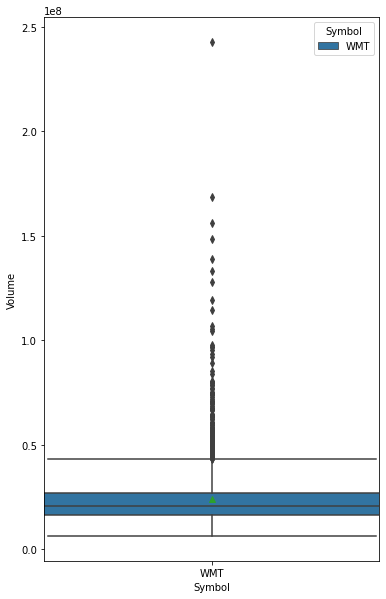

In [40]:
#Wal Mart box plot
boxplots(wmt)

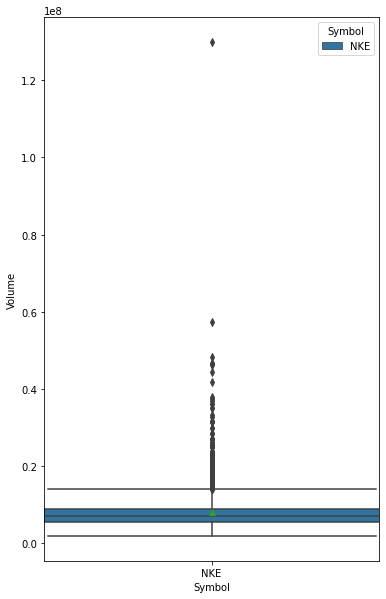

In [43]:
#Nike boxplot
boxplots(nke)

In [48]:
fig = px.histogram(portfolio,x='Close',
                   color='Symbol',title="Histogram of Portfolio's Closing Price")
fig.show()

In [ ]:
fig = px.scatter(portfolio,)